In [3]:
import numpy as np
from scipy.misc import imread
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from glob import glob
%matplotlib notebook

## Matching a single template

In [19]:
img = imread('/data/comp-vision/bbox-example-image.jpg').copy()

In [20]:
templ = imread('/data/comp-vision/cutouts/cutout6.jpg')

In [21]:
res = cv2.matchTemplate(img, templ, cv2.TM_SQDIFF_NORMED)

In [22]:
_, _, min_loc, _ = cv2.minMaxLoc(res)

In [23]:
min_loc

(834, 501)

In [24]:
w, h = templ.shape[1], templ.shape[0]
top_left = min_loc
bottom_right = top_left[0] + w, top_left[1] + h

In [25]:
res = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

<IPython.core.display.Javascript object>


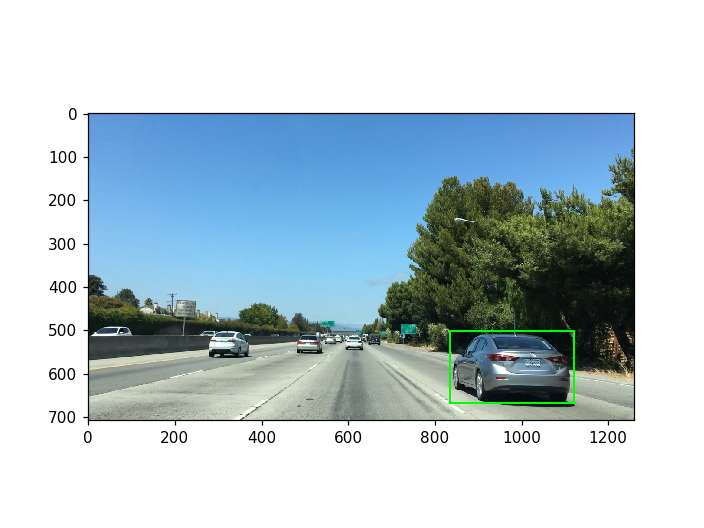

In [26]:
plt.figure()
plt.imshow(img)

## Matching multiple templates

In [27]:
cutouts = glob('/data/comp-vision/cutouts/*.jpg')
templates = []
for cutout in cutouts:
    templates.append(imread(cutout))

In [28]:
img = imread('/data/comp-vision/bbox-example-image.jpg').copy()

In [29]:
for template in templates:
    res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF_NORMED)
    _, _, min_loc, _ = cv2.minMaxLoc(res)
    w, h = template.shape[1], template.shape[0]
    top_left = min_loc
    bottom_right = top_left[0] + w, top_left[1] + h
    res = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

<IPython.core.display.Javascript object>


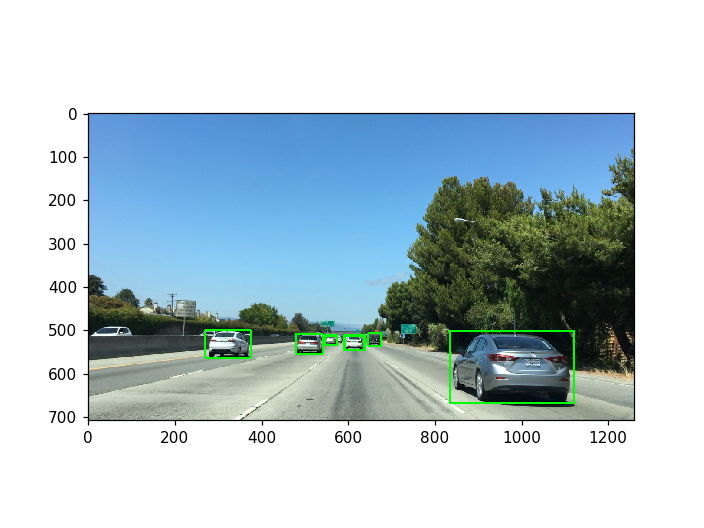

In [30]:
plt.figure()
plt.imshow(img)

## Using color histograms

In [30]:
rgb = imread('/data/comp-vision/cutouts/cutout1.jpg').copy()
reds = rgb[:, :, 0]
greens = rgb[:, :, 1]
blues = rgb[:, :, 2]
rhist = np.histogram(reds, bins=32, range=(0, 256))
ghist = np.histogram(greens, bins=32, range=(0, 256))
bhist = np.histogram(blues, bins=32, range=(0, 256))
bins = rhist[1]
centers = [bins[i-1] + (bins[i] - bins[i-1])/2 for i in range(1, len(bins))]
counts = np.concatenate((rhist[0], bhist[0], ghist[0]))

In [31]:
len(rhist[0])

32

In [32]:
len(rhist[1])

33

In [33]:
len(counts)

96

<IPython.core.display.Javascript object>


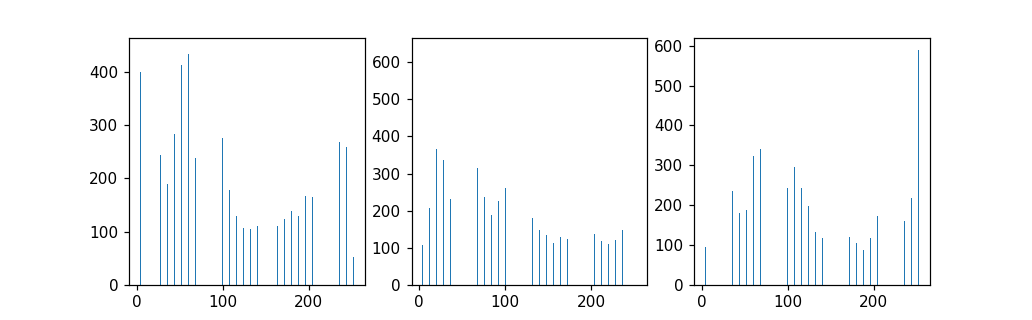

<Container object of 32 artists>

In [33]:
plt.figure()
fig1 = plt.subplot(131)
fig1.bar(centers, rhist[0])
fig2 = plt.subplot(132)
fig2.bar(centers, bhist[0])
fig3 = plt.subplot(133)
fig3.bar(centers, ghist[0])

## Color Spaces

In [34]:
img = imread("/data/comp-vision/color-spaces/000275.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = img_small
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_RGB2HSV)

In [35]:
def scatter1(points, x_label, y_label, z_label):
    # points shape is (m, n, 3) which means there are mxn points that need to be plotted.
    # Each point is specified by 3 coordinates (its x, y, and z values)
    # so points[0, 0] will give the coordinates of the first point.
    # It makese sense to reshape points into (m*n, 3) shape
    points = points.reshape((-1, 3))
    xvals = points[:, 0]
    yvals = points[:, 1]
    zvals = points[:, 2]
    plt.figure()
    fig = plt.subplot(111, projection='3d')
    fig.scatter(xvals, yvals, zvals)
    fig.set_xlabel(x_label)
    fig.set_ylabel(y_label)
    fig.set_zlabel(z_label)

<IPython.core.display.Javascript object>


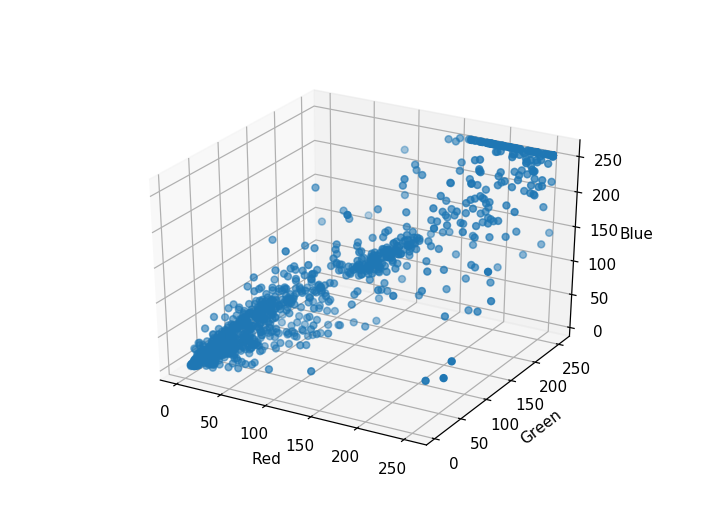

<IPython.core.display.Javascript object>


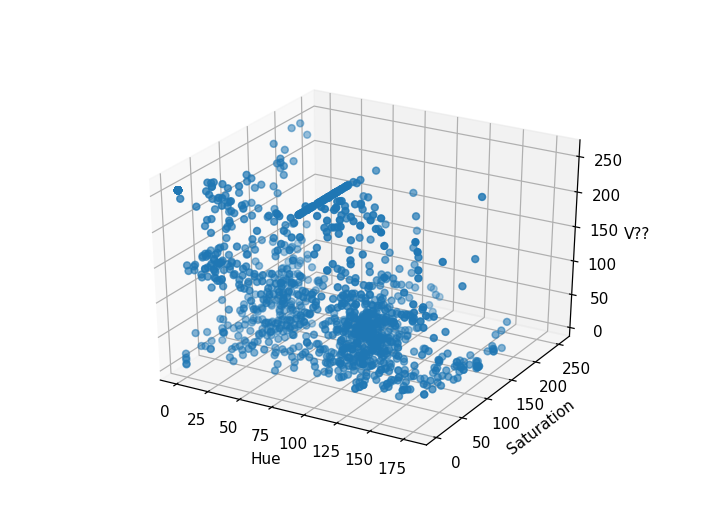

In [36]:
scatter1(img_small_RGB, 'Red', 'Green', 'Blue')
scatter1(img_small_HSV, 'Hue', 'Saturation', 'V??')

It would be easier to read the scatter plots if the points were of different colors. For example in RGB plots, it woudl be fun if the points were actually the same color as their RGB values.

In [37]:
def scatter2(points, x_label, y_label, z_label):
    points = points.reshape((-1, 3))
    
    # lets create a colors array that is m*n in size, so each point will have its own color.
    # Each point's color is specified as a (r, g, b) tuple, the caveat being that r, g, and b values have to be
    # scaled to [0., 1.] ==> why they chose to do this is beyond me.
    # So colors shape will be (m*n, 3), same as the reshaped points.
    # If points[0] = [r, g, b] then colors[0] = [r/255, g/255, b/255]
    # So really colors = points / 255
    colors = points / 255
    
    xvals = points[:, 0]
    yvals = points[:, 1]
    zvals = points[:, 2]
    plt.figure(pass)
    fig = plt.subplot(111, projection='3d')
    fig.scatter(xvals, yvals, zvals, c=colors)
    fig.set_xlabel(x_label)
    fig.set_ylabel(y_label)
    fig.set_zlabel(z_label)

<IPython.core.display.Javascript object>


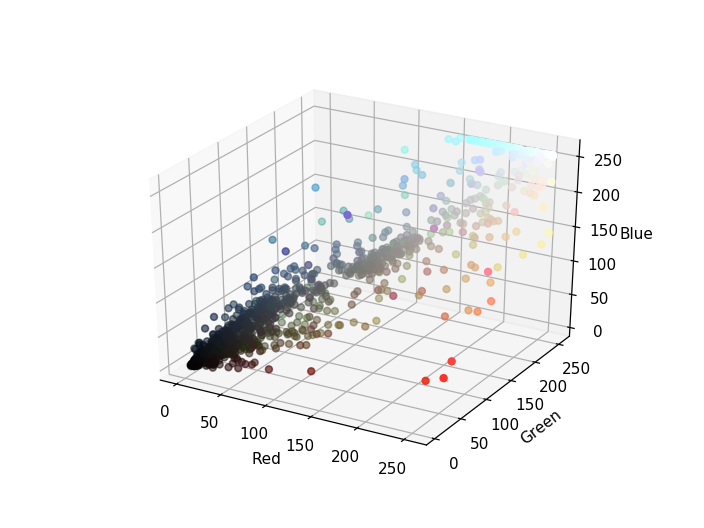

In [38]:
scatter2(img_small_RGB, 'Red', 'Green', 'Blue')

<IPython.core.display.Javascript object>


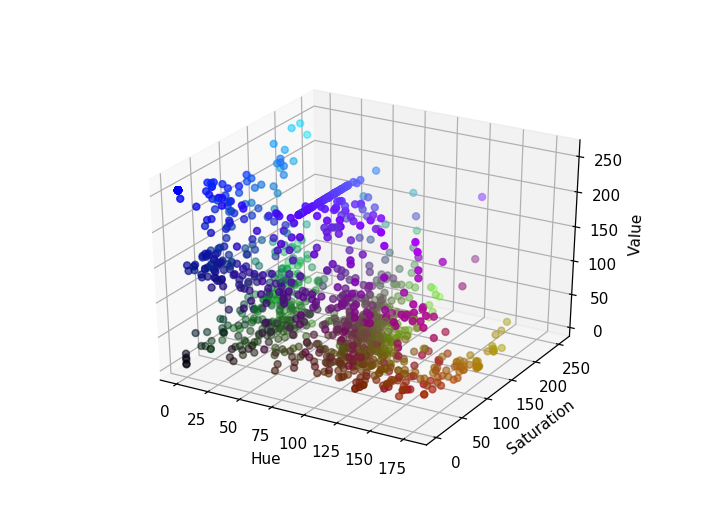

In [40]:
# Even though HSV are not RGB points, the same logic to color the points can be applied.
scatter2(img_small_HSV, 'Hue', 'Saturation', 'Value')

<IPython.core.display.Javascript object>


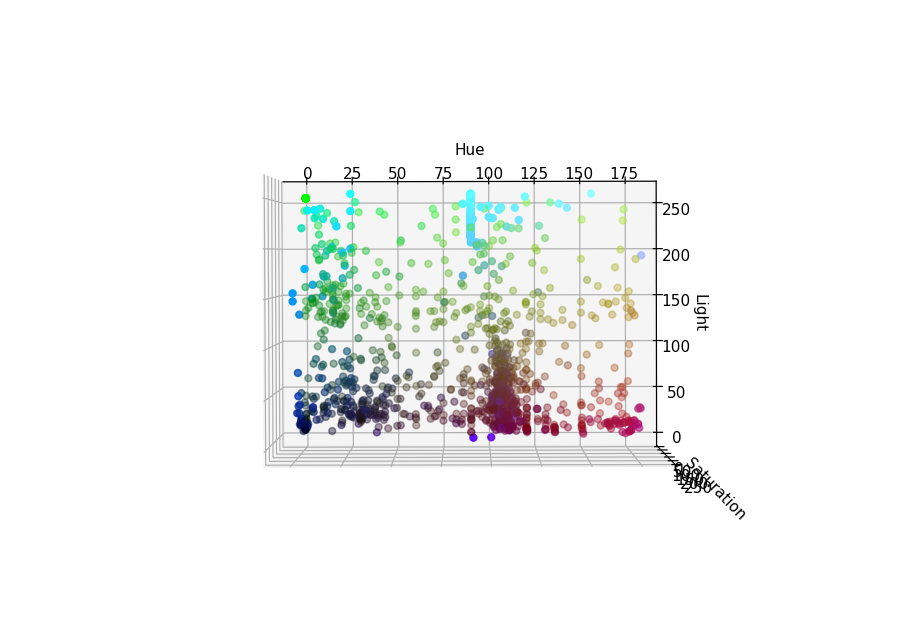

In [43]:
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_RGB2HLS)
scatter2(img_small_HLS, 'Hue', 'Light', 'Saturation')

## Histogram of Oriented Gradients

In [14]:
from skimage.feature import hog
from functools import partial

/home/avilay/anaconda3/envs/dl/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


<IPython.core.display.Javascript object>


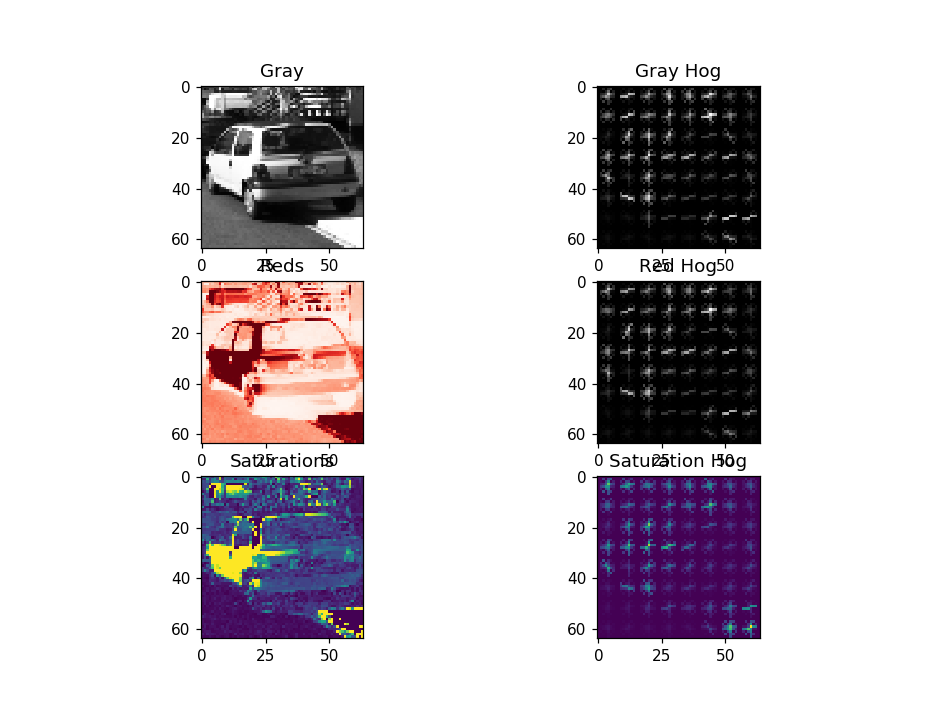

In [18]:
img = imread('/data/comp-vision/color-spaces/25.png')

hogger = partial(hog, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualise=True, feature_vector=False)


gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_features, gray_hog = hogger(gray)

reds = img[:, :, 0]
red_features, red_hog = hogger(reds)

hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
sats = hls[:, :, 2]
sat_features, sat_hog = hogger(sats)


plt.figure()

fig1 = plt.subplot(321)
fig1.imshow(gray, cmap='gray')
fig1.set_title('Gray')
fig2 = plt.subplot(322)
fig2.imshow(gray_hog, cmap='gray')
fig2.set_title('Gray Hog')

fig3 = plt.subplot(323)
fig3.imshow(reds, cmap='Reds')
fig3.set_title('Reds')
fig4 = plt.subplot(324)
fig4.imshow(red_hog, cmap='gray')
fig4.set_title('Red Hog')

fig5 = plt.subplot(325)
fig5.imshow(sats)
fig5.set_title('Saturations')
fig6 = plt.subplot(326)
fig6.imshow(sat_hog)
fig6.set_title('Saturation Hog')


In [50]:
xlen = 128
ylen = 128
win_size = 64
stride = 32
xsteps = xlen // stride - 1
ysteps = ylen // stride - 1
num_wins = xsteps * ysteps
print(xsteps, ysteps, num_wins)

3 3 9


In [51]:
y = 0
for i in range(ysteps):
    x = 0
    for j in range(xsteps):
        print(x, y)
        x += stride
    y += stride

0 0
32 0
64 0
0 32
32 32
64 32
0 64
32 64
64 64


In [52]:
1280/32

40.0

In [53]:
960/32

30.0

In [55]:
list(range(0, 960, 32))

[0,
 32,
 64,
 96,
 128,
 160,
 192,
 224,
 256,
 288,
 320,
 352,
 384,
 416,
 448,
 480,
 512,
 544,
 576,
 608,
 640,
 672,
 704,
 736,
 768,
 800,
 832,
 864,
 896,
 928]

In [42]:
xsteps

2